In [1]:
import nbsetup as nb
import ergodicpy as ep
import numpy as np
from simulations.wealth.series import series

# Disordered complexity

First looking at the standard boltzmann wealth model. We can see that the complexity starts low, as all agents start in the same state. Then even as the distribution tends to the "disorder" of higher entropy, the complexity remains low at ~3.5%

Measures at final timesteps=200
mean ensemble entropy                2.484414
ergodic entropy                      2.582729
ergodic divergence                   0.098315
ergodic complexity (2)               0.040333
ergodic complexity (1st moment)      0.038066
timesteps                          200.000000
Name: 200, dtype: float64


'50 bins from 0.0 to 43.0'

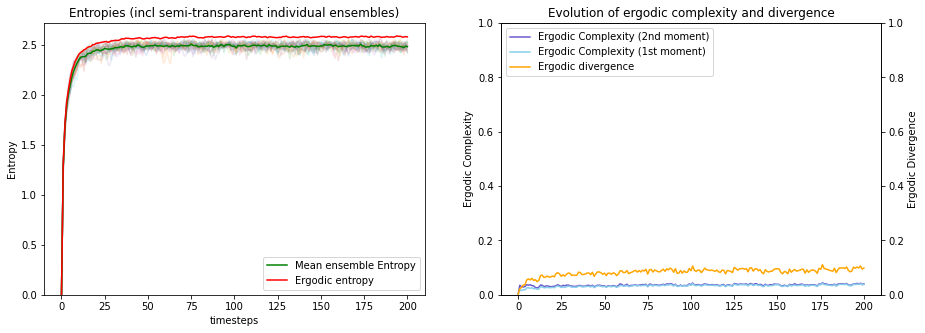

In [2]:
standard = series()
standard.bin_stats()

As we adjust the model slightly, so that agents no longer transfer 1 absolute unit and instead transfer a huge 80% of their wealth, we see the complexity double to around 5.6%. However, this value is still relatively small (anything under ~10% is considered small) and this higher complexity is likely due to the fact that the range of possible values is much higher (maximum wealth is now ~120 vs ~45 previously).

Measures at final timesteps=200
mean ensemble entropy                1.974937
ergodic entropy                      2.080386
ergodic divergence                   0.105450
ergodic complexity (2)               0.061457
ergodic complexity (1st moment)      0.050688
timesteps                          200.000000
Name: 200, dtype: float64


'50 bins from 0.0 to 117.0'

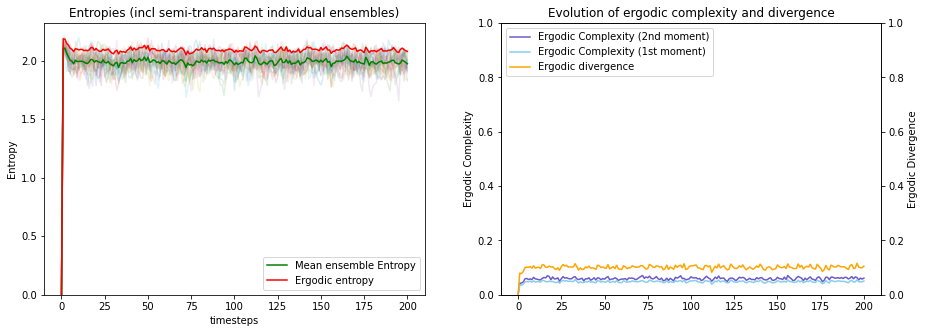

In [3]:
eighty = series(percent=0.8)
eighty.bin_stats()

# Ordered complexity

Now we introduce a complex behaviour where the system "has memory". Where it has a random chance (_p_) of transfering it's wealth to an agent it has previously given to, vs (_1-p_) to a new agent. Where _p_ is (_count of agents it's already given to_)/(_count of all agents_). So obviously this effect decreases over time as it gives to new agents.

This effect is an incredibly simply mechanism to simulate how milk and coffee mix in a coffee cup. Where the particles are not moving around entirely randomly, instead how they move is dependant on fluid dynamics. That is, they're dependant on their nearby neighbours initially, but becomes less so over time as the whole thing mixes.

What we see below is while this "complex" behaviour (i.e. having memory and dependancy on neighbours or past actions) spikes for the initial mixing period but levels off back to the high entropy, disordered state by the end.

Measures at final timesteps=200
mean ensemble entropy                2.002411
ergodic entropy                      2.098385
ergodic divergence                   0.095974
ergodic complexity (2)               0.062055
ergodic complexity (1st moment)      0.045737
timesteps                          200.000000
Name: 200, dtype: float64


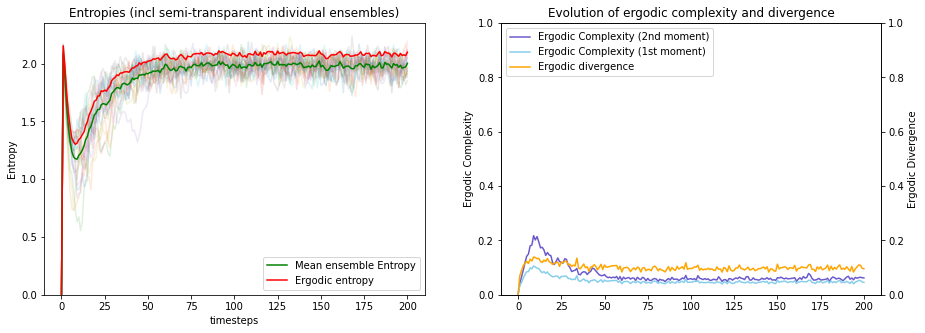

In [4]:
complex_one = series(percent=0.8, threshold=1.0)

Threshold is a metric which adjusts _p_ so the complex effect is increased and extended. Here we see the complexity is allowed to grow to a much higher level.

Measures at final timesteps=200
mean ensemble entropy                1.891878
ergodic entropy                      2.000267
ergodic divergence                   0.108389
ergodic complexity (2)               0.077936
ergodic complexity (1st moment)      0.054187
timesteps                          200.000000
Name: 200, dtype: float64


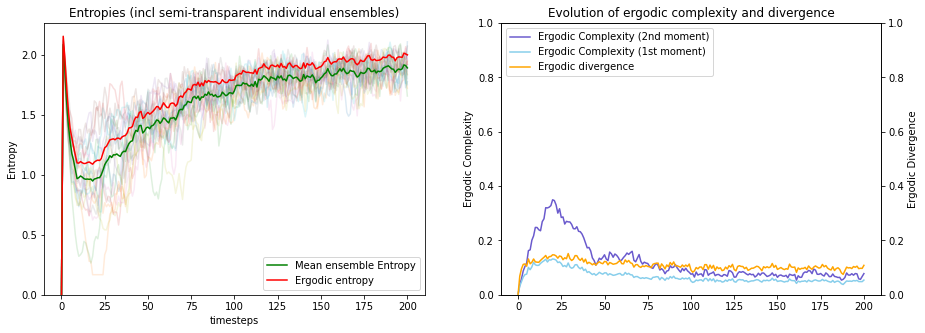

In [7]:
complex_five = series(percent=0.8, threshold=5.0)

While if you increase the threshold so much so that the complex behaviour is persisted, we see the ergodic complexity in this case also persist.

Measures at final timesteps=200
mean ensemble entropy                0.895932
ergodic entropy                      1.042543
ergodic divergence                   0.146611
ergodic complexity (2)               0.368939
ergodic complexity (1st moment)      0.140628
timesteps                          200.000000
Name: 200, dtype: float64


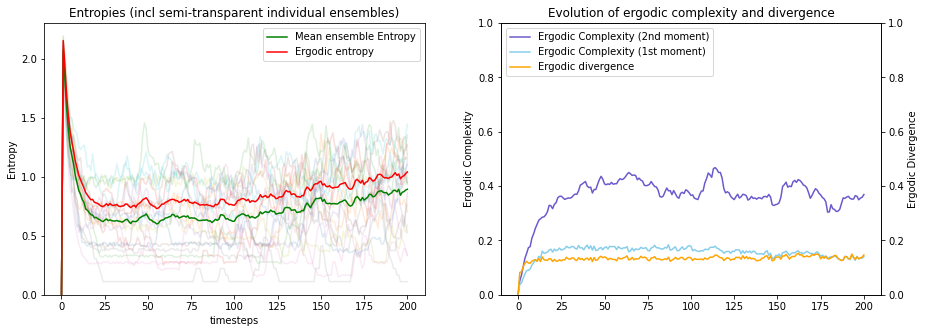

In [8]:
complex_hundred = series(percent=0.8, threshold=100.0)